In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
temp = temp[:365]

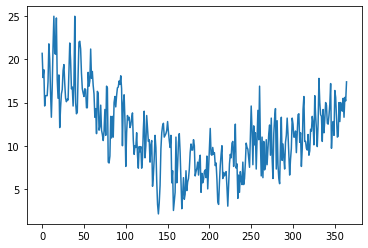

In [3]:
plt.plot(temp.Temp)

In [4]:
temp.Temp[:10].mean(),temp.Temp[:10].std()

(17.86, 2.4180800464647794)

In [5]:
temp.Temp[10:20].mean(),temp.Temp[10:20].std()

(19.2, 3.9510898637098992)

In [6]:
temp.Temp[20:30].mean(),temp.Temp[20:30].std()

(16.309999999999995, 2.1921323966504493)

In [7]:
temp.Temp[300:310].mean(),temp.Temp[300:310].std()

(11.610000000000001, 1.3811830677599064)

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(temp.Temp)

(-2.4549518801166097,
 0.12682316388801873,
 6,
 358,
 {'1%': -3.448748905151901,
  '5%': -2.8696473721448728,
  '10%': -2.5710891239349585},
 1607.4780885337195)

In [9]:
#Agumented Dicky Fuller's Test
#used for checking stationarity

# Null Hypothesis: It is non stationary
# Alternate Hypothesis: It is stationary

def adfuller_test(val):
    
    result = adfuller(val)
    
    labels = ['ADF Test Statistic','p-value','Lags','Number of Observations Used']
    
    for value,label in zip(result,labels):
        
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


adfuller_test(temp.Temp)

ADF Test Statistic : -2.4549518801166097
p-value : 0.12682316388801873
Lags : 6
Number of Observations Used : 358
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [10]:
#Differencing

temp['1st Differencing'] = temp.Temp - temp.Temp.shift(1)
adfuller_test(temp['1st Differencing'].dropna())

ADF Test Statistic : -7.558332159146303
p-value : 3.0570328858541614e-11
Lags : 17
Number of Observations Used : 346
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [11]:
#Differencing

temp['2nd Differencing'] = temp['1st Differencing'] - temp['1st Differencing'].shift(1)
adfuller_test(temp['2nd Differencing'].dropna())

ADF Test Statistic : -8.830005396162226
p-value : 1.780373069387797e-14
Lags : 17
Number of Observations Used : 345
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


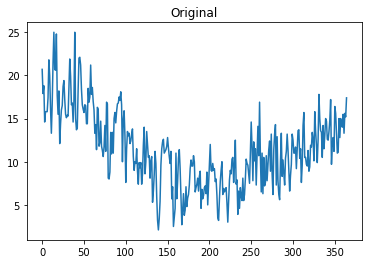

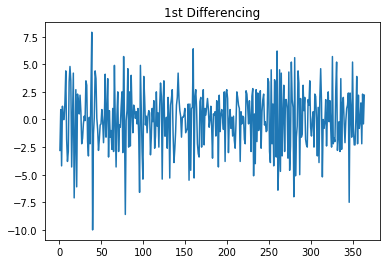

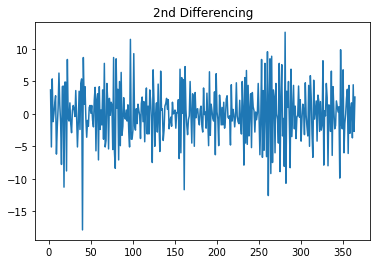

In [12]:
plt.plot(temp.Temp)
plt.title('Original')
plt.show()

plt.plot(temp['1st Differencing'].dropna())
plt.title('1st Differencing')
plt.show()

plt.plot(temp['2nd Differencing'].dropna())
plt.title('2nd Differencing')
plt.show()

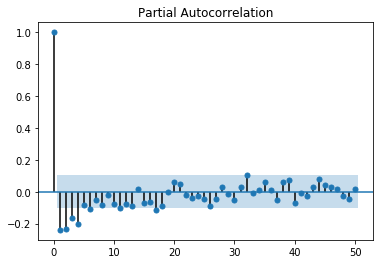

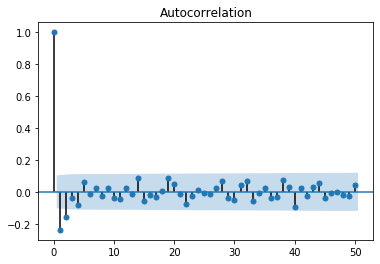

In [13]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(temp['1st Differencing'].dropna(), lags=50)
plot_acf(temp['1st Differencing'].dropna(), lags=50)
plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

X = temp.Temp
train = temp['1st Differencing'][1:350]
test  = temp['1st Differencing'][350:]

df_perf = []
for i in range(5):
    for j in range(3):
        model = ARMA(train.dropna(), order=(i, j)).fit()
        #preds = model.predict(349,363)
        predictions = model.predict(start=len(train), end=len(train)+len(test)-1)
        df_perf.append([i,j,mean_squared_error(test, preds),mean_absolute_error(test, preds)])
        
pd.DataFrame(df_perf,columns = ['AR (p)','MA (q)','MSE','MAE'])

,AR (p),MA (q),MSE,MAE
0,0,0,4.929526,1.865841
1,0,1,4.929526,1.865841
2,0,2,4.929526,1.865841
3,1,0,4.929526,1.865841
4,1,1,4.929526,1.865841
5,1,2,4.929526,1.865841
6,2,0,4.929526,1.865841
7,2,1,4.929526,1.865841
8,2,2,4.929526,1.865841
9,3,0,4.929526,1.865841


In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st Differencing   No. Observations:                  349
Model:                     ARMA(4, 2)   Log Likelihood                -804.974
Method:                       css-mle   S.D. of innovations              2.426
Date:                Sat, 25 Apr 2020   AIC                           1625.948
Time:                        14:15:03   BIC                           1656.788
Sample:                             0   HQIC                          1638.225
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0163      0.020     -0.818      0.413      -0.055       0.023
ar.L1.1st Differencing    -0.2782      0.258     -1.080      0.280      -0.783       0.227
ar.L2.1st Differencing     0.3030      0.139      2.185      0.029       0.031       0.575
ar.L3.1st Differencing    -0.0082      0.064     -0.128      0.898      -0.134       0.117
ar.L4.1st Differencing    -0.0259      0.061     -0.425      0.671      -0.145       0.093
ma.L1.1st Differencing    -0.1598      0.253     -0.633      0.527      -0.655       0.335
ma.L2.1st Differencing    -0.6902      0.234     -2.947      0.003      -1.149      -0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3843           -1.2162j            2.6766           -0.0751
AR.2            2.3843           +1.2162j            2.6766            0.0751
AR.3           -1.5050           -0.0000j            1.5050           -0.5000
AR.4           -3.5798           -0.0000j            3.5798           -0.5000
MA.1            1.0934           +0.0000j            1.0934            0.0000
MA.2           -1.3250           +0.0000j            1.3250            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
model = ARMA(train.dropna(), order=(4, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st Differencing   No. Observations:                  349
Model:                     ARMA(4, 0)   Log Likelihood                -816.142
Method:                       css-mle   S.D. of innovations              2.507
Date:                Sat, 25 Apr 2020   AIC                           1644.284
Time:                        14:15:14   BIC                           1667.414
Sample:                             0   HQIC                          1653.491
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0197      0.064     -0.309      0.757      -0.145       0.105
ar.L1.1st Differencing    -0.3604      0.053     -6.841      0.000      -0.464      -0.257
ar.L2.1st Differencing    -0.3358      0.055     -6.138      0.000      -0.443      -0.229
ar.L3.1st Differencing    -0.2248      0.055     -4.106      0.000      -0.332      -0.118
ar.L4.1st Differencing    -0.1913      0.053     -3.599      0.000      -0.296      -0.087
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.5986           -1.3079j            1.4384           -0.1817
AR.2            0.5986           +1.3079j            1.4384            0.1817
AR.3           -1.1861           -1.0579j            1.5893           -0.3841
AR.4           -1.1861           +1.0579j            1.5893            0.3841
-----------------------------------------------------------------------------
"""

In [17]:
model = ARMA(train.dropna(), order=(0, 2)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st Differencing   No. Observations:                  349
Model:                     ARMA(0, 2)   Log Likelihood                -808.451
Method:                       css-mle   S.D. of innovations              2.450
Date:                Sat, 25 Apr 2020   AIC                           1624.901
Time:                        14:17:19   BIC                           1640.322
Sample:                             0   HQIC                          1631.040
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0158      0.024     -0.654      0.513      -0.063       0.032
ma.L1.1st Differencing    -0.4700      0.049     -9.558      0.000      -0.566      -0.374
ma.L2.1st Differencing    -0.3488      0.051     -6.776      0.000      -0.450      -0.248
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.1486           +0.0000j            1.1486            0.0000
MA.2           -2.4961           +0.0000j            2.4961            0.5000
-----------------------------------------------------------------------------
"""

In [95]:
undiffpreds = pd.concat([pd.Series(temp['Temp'][0]),pd.Series(train.values),preds]).cumsum().tail(15)

In [99]:
undiffpreds

349    12.149810
350    12.262870
351    12.497795
352    12.483971
353    12.517059
354    12.482401
355    12.479681
356    12.453610
357    12.443053
358    12.422597
359    12.408959
360    12.390904
361    12.375822
362    12.358775
363    12.343036
dtype: float64

In [67]:
x = new['1st Differencing'].fillna(new.Temp).cumsum()
x

0     20.7
1     17.9
2     18.8
3     14.6
4     15.8
5     15.8
6     15.8
7     17.4
8     21.8
9     20.0
10    16.2
11    13.3
12    16.7
13    21.5
14    25.0
Name: 1st Differencing, dtype: float64

<Figure size 720x720 with 0 Axes>

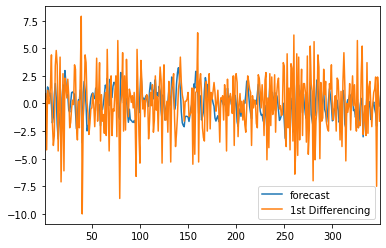

In [107]:
plt.figure(figsize=(10,10))
model.plot_predict()
plt.show()

In [108]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:       1st Differencing   No. Observations:                  349
Model:                     ARMA(4, 2)   Log Likelihood                -804.974
Method:                       css-mle   S.D. of innovations              2.426
Date:                Sat, 18 Apr 2020   AIC                           1625.948
Time:                        05:26:34   BIC                           1656.788
Sample:                             0   HQIC                          1638.225
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.0163      0.020     -0.818      0.414      -0.055       0.023
ar.L1.1st Differencing    -0.2782      0.258     -1.080      0.281      -0.783       0.227
ar.L2.1st Differencing     0.3030      0.139      2.185      0.030       0.031       0.575
ar.L3.1st Differencing    -0.0082      0.064     -0.128      0.898      -0.134       0.117
ar.L4.1st Differencing    -0.0259      0.061     -0.425      0.671      -0.145       0.093
ma.L1.1st Differencing    -0.1598      0.253     -0.633      0.527      -0.655       0.335
ma.L2.1st Differencing    -0.6902      0.234     -2.947      0.003      -1.149      -0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3843           -1.2162j            2.6766           -0.0751
AR.2            2.3843           +1.2162j            2.6766            0.0751
AR.3           -1.5050           -0.0000j            1.5050           -0.5000
AR.4           -3.5798           -0.0000j            3.5798           -0.5000
MA.1            1.0934           +0.0000j            1.0934            0.0000
MA.2           -1.3250           +0.0000j            1.3250            0.5000
-----------------------------------------------------------------------------
"""